<a href="https://colab.research.google.com/github/AndrewMelekhov/ColabFiles/blob/main/lab7_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#%matplotlib notebook

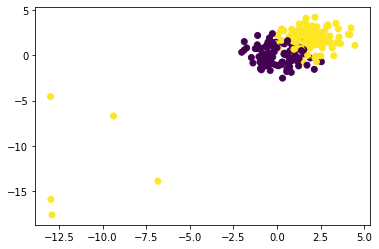

In [ ]:
# 1. Загружаем данные:
data = np.loadtxt('data-logistic.csv', delimiter=',')
X = data[:, 1:]
y = data[:, 0]
plt.scatter(X[:, 0], X[:, 1], c = y)
#plt.show()

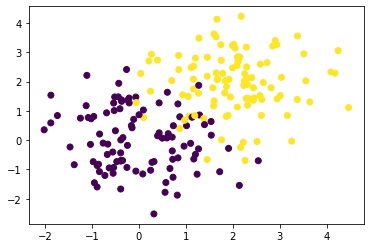

In [ ]:
# Уберем выбросы:
data = data[data[:,2] > -4]
X = data[:, 1:]
y = data[:, 0]
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
def difF(x, w, y):
    res = 1 - 1 / (1 + np.exp(-y * np.dot(x, w)))
    return np.array([res , res])

def step_gradient(x, w, y, k, C):
    l = len(y)
    return w + k/l *(y * X.T * difF(X, w, y)).sum(axis=1) - k*C*w

In [ ]:
c = 0.1
w0 = np.array([0 , 0])
for i in range(10000):
    w = step_gradient(X, w0, y, 0.1, c)
    #print(w)
    if np.max(np.abs(w - w0)) < 1e-5:
        print("Результат:",i, w)
        break
    w0 = w

Результат: 193 [0.58192982 0.46257353]


In [ ]:
def sigma(x):
    return 2 / (1 + np.exp(-x)) - 1

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, sigma(np.dot(X, w))))

# Ответ 1. 0.9268571428571428
# Ответ 2. 0.9362857142857142

0.984


Находим минимимум следующей функции:

In [ ]:
def F(X, w, y, C):
    return np.sum(np.log(1 + np.exp(-y * np.dot(X, w))))/len(y) + C/2*np.linalg.norm(w,2) ** 2
w = [0, 0]
F(X, w, y, c)

0.6931471805599452

In [ ]:
wx1 = np.linspace(-3, 5, 50)
wx2 = np.linspace(-3, 5, 50)
wX1, wX2 = np.meshgrid(wx1, wx2)
Z = np.zeros_like(wX1)
for i in range(wX1.shape[0]):
    for j in range(wX1.shape[1]):
        Z[i, j] = F(X, [wX1[i, j], wX2[i, j]], y, c)

array([0.58191987, 0.46258135])

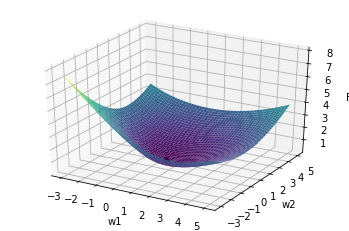

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.plot_surface(wX1, wX2, Z, rstride=1, cstride=1 , cmap='viridis') #, edgecolor='none')
ax.scatter(w0[0], w0[1], F(X, w0, y, c), color='#000000')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('F');
w0

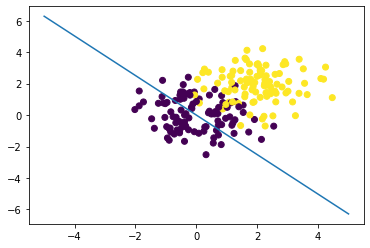

In [ ]:
wx = np.linspace(-5, 5, 100)
#fig = plt.figure()
plt.plot(wx,  -w0[0]/w0[1] * wx, '-')
plt.scatter(X[:, 0], X[:, 1], c = y)

Добавим третий параметр w0 к прямой w0 + w1*x + w2*y = 0:

In [ ]:
# Уберем выбросы:
data2 = data[data[:,2]>-4]

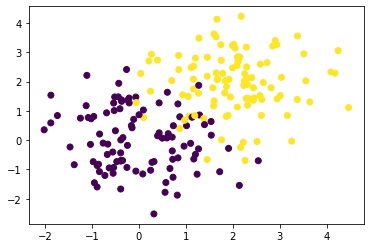

In [ ]:
X = data2[:, 1:]
y = data2[:, 0]
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
def difF(x, w, y):
    res = 1 - 1 / (1 + np.exp(-y * np.dot(x, w)))
    return np.array([res , res, res])

def step_gradient(x, w, y, k, C):
    l = len(y)
    return w + k/l *(y * x.T * difF(x, w, y)).sum(axis=1) - k*C*w

In [ ]:
Xr = np.concatenate((np.ones((X.shape[0],1) ), X ), axis=1)
Xr[0:5]

array([[ 1.        , -0.66382654, -0.13852572],
       [ 1.        ,  1.9945955 ,  2.46802468],
       [ 1.        , -1.24739492,  0.74942464],
       [ 1.        ,  2.30937425,  1.89983556],
       [ 1.        ,  0.84914331,  2.40774982]])

In [ ]:
w0 = np.array([0 , 0, 0])
for i in range(10000):
    w = step_gradient(Xr, w0, y, 0.1, 0.01)
    #print(i, w)
    if np.max(np.abs(w - w0)) < 1e-5:
        print("Результат:", i, w)
        break
    w0 = w

Результат: 1830 [-2.41591261  1.52733112  1.23069392]


array([-2.41591261,  1.52733112,  1.23069392])

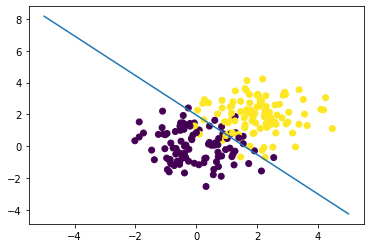

In [ ]:
wx = np.linspace(-5, 5, 100)
#fig = plt.figure()
plt.plot(wx,  -w[1]/w[2] * wx - w[0]/w[2], '-')
plt.scatter(X[:, 0], X[:, 1], c = y)
w

In [ ]:
def sigma(x):
    return 1 / (1 + np.exp(-x)) 


#print(sigma1(np.dot(X, w)))
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y, sigma(np.dot(Xr, w))))


# Ответ 1. 0.9268571428571428
# Ответ 2. 0.9362857142857142

0.9839
